# Asg-4 focuses on 

## NFA2DFA (review) -- LT

## Reversal of NFA by hand -- XL

## Conversion to GNFA and Two Elimination Orders -- AR

## Chasing down the RE2NFA Components -- SV

## Here is the  plan

1. In LT, you will

    a. take a given nfa called nfa1
    
    b. convert it to dfa1 
    
    c. reverse nfa1 by hand obtaining rnfa1
    
    d. inspect and conclude (listing six paths) that rnfa1 is indeed a reverse of nfa1

2. In XL you will

    a. learn about a few DFA utilities such as totalize_dfa and dotObj_dfa_w_bh
    
    b. extract an RE by inspecting nfa1 and write it down as RE1_hand
    
    c. reverse RE1_hand by inspection, writing the result down as Rev_RE1_hand
    
    d. Understand the function del_gnfa_states via its help command
    

3. In AR you will

    a. obtain a GNFA for rnfa1, calling it grnfa1
    
    b. apply two elimination orders for states on grnfa1
    
    c. obtain Rev_RE1 and Rev_RE2
    
    d. check that Rev_RE1 and Rev_RE2 and Rev_RE1_hand are all isomorphic
    

4. In SV you will 

    a. print the NFA for Rev_RE2 and answer the stated questions.
    
    b. print the NFA for Rev_RE1_hand and answer the questions.

Please follow the instructions and submit your finished notebook as described in previous assignments.
 

# Asg-4 imports 


In [10]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.Def_NFA    import *
from jove.Def_DFA    import *
from jove.Def_NFA2RE import *
from jove.Def_RE2NFA import *
from jove.AnimateNFA import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# 1. NFA to DFA by hand and Checking (LT) + Getting a simple RE

You are given this NFA below

## 1(a). nfa1 is given below

Questions follow under 1(b)

In [11]:
# Given NFA

nfa1 = md2mc('''NFA
I1 : '' -> B
I1 : a  -> I2

I2 : c  -> F3
I2 : b  -> B

B : s  -> B
B : d  -> F4
B : f  -> F3


''')


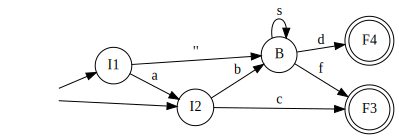

In [12]:
dotObj_nfa(nfa1)

## 1(b). Obtain the DFA of the above NFA by hand. I've given you a start.

1. Obtain the Eclosure of the initial NFA state. That is the DFA's initial state.

2. When we go from I1_I2_B (set of states corresponding to the Eclosure) and give that state 'a', it goes to "wasI2". This is no longer the initial state of the DFA, and hence called "wasI2".

3. Finish the remaining steps below.

Show your work by typing in the Eclosure details of each step wherever there is a $\varepsilon$ involved in a given DFA state

For DFA states where there is no $\varepsilon$ involved, just show the final Eclosed result.

Use as many bullets as necessary to clearly show your work:

* Going from `I1_I2_B`:
  - Obtain the E-closure of `{I1, I2, B}`, yielding `{I1, I2, B}`.
  - When we go from `I1_I2_B` (set of states corresponding to the E-closure) and give that state either a **'b'** or an **'s'**, it goes to `{B}`, whose E-closure is `{B}`, which didn't add any new states.
  - Call that destination state `B`.

* Going from `I1_I2_B`:
  - Obtain the E-closure of `{I1, I2, B}`, yielding `{I1, I2, B}`.
  - When we go from `I1_I2_B` (set of states corresponding to the E-closure) and give that state a **'d'**, it goes to `{F4}`, whose E-closure is `{F4}`, which didn't add any new states.
  - Call that destination state `F4`. Since it was a final state in the original NFA, it will also be a final state in the DFA.

* Going from `I1_I2_B`:
  - Obtain the E-closure of `{I1, I2, B}`, yielding `{I1, I2, B}`.
  - When we go from `I1_I2_B` (set of states corresponding to the E-closure) and give that state a **'c'** or an **'f'**, it goes to `{F3}`, whose E-closure is `{F3}`, which didn't add any new states.
  - Call that destination state `F3`. Since it was a final state in the original NFA, it will also be a final state in the DFA.

* Going from `wasI2`:
  - Obtain the E-closure of `{I2}`, yielding `{I2}`.
  - When we go from `wasI2` (set of states corresponding to the E-closure) and give that state a **'b'**, it goes to `{B}`, whose E-closure is `{B}`, which didn't add any new states.
  - Call that destination state `B`, which already exists.

* Going from `wasI2`:
  - Obtain the E-closure of `{I2}`, yielding `{I2}`.
  - When we go from `wasI2` (set of states corresponding to the E-closure) and give that state a **'c'**, it goes to `{F3}`, whose E-closure is `{F3}`, which didn't add any new states.
  - Call that destination state `F3`, which already exists.

* Going from `B`:
  - Obtain the E-closure of `{B}`, yielding `{B}`.
  - When we go from `B` (set of states corresponding to the E-closure) and give that state a **'d'**, it goes to `{F4}`, whose E-closure is `{F4}`, which didn't add any new states.
  - Call that destination state `F4`, which already exists.

* Going from `B`:
  - Obtain the E-closure of `{B}`, yielding `{B}`.
  - When we go from `B` (set of states corresponding to the E-closure) and give that state a **'f'**, it goes to `{F3}`, whose E-closure is `{F3}`, which didn't add any new states.
  - Call that destination state `F3`, which already exists.

* Going from `B`:
  - Obtain the E-closure of `{B}`, yielding `{B}`.
  - When we go from `B` (set of states corresponding to the E-closure) and give that state a **'s'**, it goes to `{B}`, whose E-closure is `{B}`, which didn't add any new states.
  - Call that destination state `B`, which already exists.

In [13]:
# DFA of nfa1

dfa1 = md2mc('''DFA

I1_I2_B :a-> wasI2
I1_I2_B :b|s-> B
I1_I2_B :c|f-> F3
I1_I2_B :d-> F4

wasI2 :b-> B
wasI2 :c-> F3

B :d-> F4
B :f-> F3
B :s-> B

''')

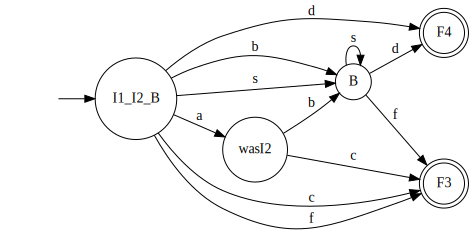

In [14]:
dotObj_dfa(dfa1)

## 1(c). Reverse nfa1 by hand, below. In doing so, it is helpful for me to suggest state renamings for you

1) Change F3 to I3

2) Change F4 to I4

3) Change I1 and I2 to F1 and F2

4) Now, reverse the transitions of nfa1, obtaining "rnfa1" below
 

In [15]:
# There is no Jove function to reverse automatically - do it by hand!

rnfa1 = md2mc('''
NFA

I4 :d-> B

I3 :c-> F2
I3 :f-> B

B :''-> F1
B :b-> F2
B :s -> B

F2 :a-> F1

''')

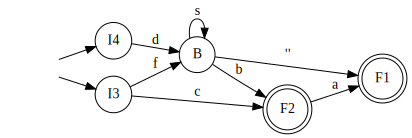

In [16]:
dotObj_nfa(rnfa1)

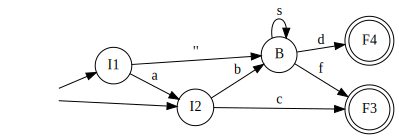

In [17]:
dotObj_nfa(nfa1)

## 1(d). Inspect and conclude that rnfa1 is truly the reverse of nfa1


### List the first six strings in numeric order and check that they have been correctly reversed. 

State the string in the original machine and explain (by specifying a path as a sequence of states) that this string is present in the reversed machine also.

1. "c", reversed: "c"
  * In the original NFA: `I2 :c-> F3`
  * In the reversed NFA: `I3 :c-> F2`

2. "d", reversed: "d"
  - In the original NFA: `I1 :''-> B :d-> F4`
  - In the reversed NFA: `I4 :d-> B :''-> F1`

3. "f", reversed: "f"
  - In the original NFA: `I1 :''-> B :f-> F3`
  - In the reversed NFA: `I3 :f-> B :''-> F1`

4. "ac", reversed: "ca"
  - In the original NFA: `I1 :a-> I2 :c-> F3`
  - In the reversed NFA: `I3 :c-> F2 :c-> F1`

5. "bd", reversed: "db"
  - In the original NFA: `I2 :b-> B :d-> F4`
  - In the reversed NFA: `I4 :d-> B :b-> F2`

6. "bf", reversed: "fb"
  - In the original NFA: `I2 :b-> B :f-> F3`
  - In the reversed NFA: `I3 :f-> B :b-> F2`

# 2. Extraction of RE by Inspection (XL) and other things before it


## 2(a). You can totalize dfa1 to obtain the totalized machine

* Explain totalize_dfa in a few sentences below, by looking at the Delta before and After

In [31]:
tdfa1 = totalize_dfa(dfa1)
print("dfa1:", dfa1, "\n")
print("tdfa1:", tdfa1)

dfa1: {'Q': {'I1_I2_B', 'B', 'wasI2', 'F4', 'F3'}, 'Sigma': {'a', 's', 'd', 'b', 'f', 'c'}, 'Delta': {('I1_I2_B', 'a'): 'wasI2', ('I1_I2_B', 'b'): 'B', ('I1_I2_B', 's'): 'B', ('I1_I2_B', 'c'): 'F3', ('I1_I2_B', 'f'): 'F3', ('I1_I2_B', 'd'): 'F4', ('wasI2', 'b'): 'B', ('wasI2', 'c'): 'F3', ('B', 'd'): 'F4', ('B', 'f'): 'F3', ('B', 's'): 'B'}, 'q0': 'I1_I2_B', 'F': {'F4', 'F3'}} 

tdfa1: {'Q': {'I1_I2_B', 'B', 'wasI2', 'BH', 'F4', 'F3'}, 'Sigma': {'a', 's', 'd', 'b', 'f', 'c'}, 'Delta': {('I1_I2_B', 'a'): 'wasI2', ('I1_I2_B', 'b'): 'B', ('I1_I2_B', 's'): 'B', ('I1_I2_B', 'c'): 'F3', ('I1_I2_B', 'f'): 'F3', ('I1_I2_B', 'd'): 'F4', ('wasI2', 'b'): 'B', ('wasI2', 'c'): 'F3', ('B', 'd'): 'F4', ('B', 'f'): 'F3', ('B', 's'): 'B', ('B', 'a'): 'BH', ('B', 'b'): 'BH', ('B', 'c'): 'BH', ('wasI2', 'a'): 'BH', ('wasI2', 's'): 'BH', ('wasI2', 'd'): 'BH', ('wasI2', 'f'): 'BH', ('F4', 'a'): 'BH', ('F4', 's'): 'BH', ('F4', 'd'): 'BH', ('F4', 'b'): 'BH', ('F4', 'f'): 'BH', ('F4', 'c'): 'BH', ('F3', 'a'):

### Your explanation of totalize_dfa

* `totalize_dfa` checked every state in the original DFA if they assigned a path upon every symbol in the alphabet. It then created paths from every state to a "black-hole" state (named `BH`) upon getting any of those missing symbols.

* A black-hole state is simply a non-final state that wraps any input to itself, making it unescapable. Once entered this state, the machine will never accept the string no matter how long the input is.

##  A printout may look the same ... till you print w_bh 

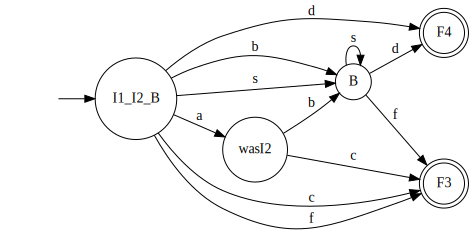

In [26]:
dotObj_dfa(tdfa1)

##  Let us print with blackhole

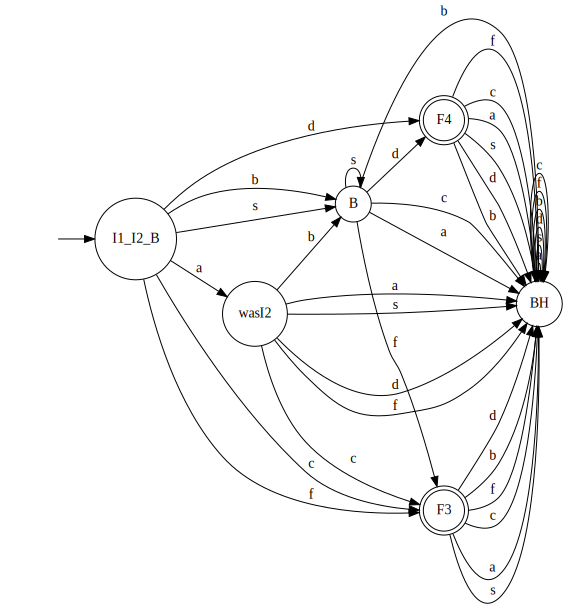

In [27]:
dotObj_dfa_w_bh(tdfa1)

### Was it a good idea to not always show black-holes?

* In what circumstances might you still need to apply the _w_bh view option?

I think it is a good idea to hide the black-holes in most cases, because it makes the graph much more easier to read; the readers would just agree that any undefined input always leads to the black-hole.

However, a DFA should have a path for every possible input from any state since that was one of the requirements. In the case someone wanted to view the *complete* version of any DFA, black-holes should be shown.

## 2(b) Obtain an RE by looking at nfa1

* Follow all paths

* Summarize the paths in your head, using the Star operator suitably




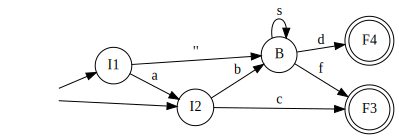

In [28]:
dotObj_nfa(nfa1)

In [ ]:
RE1_hand = "(''+a)c+(''+b+ab)s*(d+f)"

## 2(c) Reverse RE1 by hand to obtain Rev_RE1

Once you have an RE, you can "visually reverse it" for simple REs

In [ ]:
Rev_RE1_hand = "c(''+a)+(d+f)s*(''+b+ba)"

## 2(d) Understand del_gnfa_states via help

In [29]:
# help of del_gnfa_states run below
help(del_gnfa_states)

Help on function del_gnfa_states in module jove.Def_NFA2RE:

del_gnfa_states(Gin, DelList=[])
    Given a GNFA Gin with no unreachable states, 
    delete all states but f
    or Real_I and Real_F.
    If DelList is given, follow the state deletion
    order mentioned therein; else choose order internally.
    
    Return a triple (Gfinal, dotObj_List, final_re_str), where
      Gfinal       : the final GNFA
      dotObj_List  : a list of Dot objects recording the process of
                     deleting states and forming intermediate REs
      final_re_str : the final RE as a string (ready to be fed to  
                     re2nfa for converting back to an NFA)



### Document what you learned from the function help of del_gnfa_states and summarize below


* The function `del_gnfa_states` takes two arguments: a generalized NFA with no unreachable states, and optionally, the order of which the states should be eliminated one by one.

* The function will then elimiante the states between the initial and final states in the NFA in the provided order (or an arbitrary order if none was set). By eliminating the states it generates/combines the symbols on the paths into intermediate regular expressions, and finally into one comprehensive RE described by the NFA.

* The function then returns the resulting NFA and the regular expression generated. It even records the elimination process so we can use that result to better study how a regular expression is read from an NFA.

# 3. Converting to GNFA and Attempting Two Elimination Orders (AR)

Work on rnfa1 to obtain Rev_RE1 and Rev_RE2 

## Obtain grnfa1 below via a suitable command

In [ ]:
grnfa1 = mk_gnfa(rnfa1)

In [ ]:
dotObj_gnfa(grnfa1)

## 3(b,c) i : Apply the elimination order by supplying the second argument 
['B', 'F2', 'F1', 'I3', 'I4']

as you learned in the help

In [ ]:
(Gfinal, DO, Rev_RE1) = del_gnfa_states(...args filled here...)

In [ ]:
Rev_RE1

In [ ]:
dotObj_dfa(min_dfa(nfa2dfa(re2nfa(Rev_RE1))))

## 3(b,c) ii : Apply the elimination order by supplying the second argument 
 ['I3', 'I4', 'F1', 'B', 'F2' ]

as you learned in the help

## Examine DO[0] through DO[Last_Legal_Item] (find out how long DO is)

DO[0] is the initial GNFA machine, DO[1] is the next one, and so on. You will see each step getting
rid of one state.

### Summarize your observation of the state elimination and which REs were introduced as a result. Use one bullet per question answered below.

*

*

*

*

*

*

*

In [ ]:
(Gfinal, DO, Rev_RE2) = del_gnfa_states(grnfa1, ...args...)

In [ ]:
Rev_RE2

## Examine DO[0] through DO[Last_Legal_Item] (find out how long DO is)

### Summarize your observation of the state elimination and which REs were introduced as a result

*

*

*

*

*

*

*

## 3(d)i Check for isomorphism as requested between Rev_RE1 and Rev_RE2

Apply a Jove call that is compact (and is in my lecture slides) that checks that Rev_RE1 and Rev_RE2 
are equivalent. It has to involve iso_dfa and min_dfa and other calls.

In [ ]:
iso_dfa( ... )

In [ ]:
# Just look at it again for comparison

...Rev_RE1_hand...

## 3(d)i Check for isomorphism as requested between Rev_RE1 and Rev_RE1_hand

Same methods as above.

In [ ]:
iso_dfa( ... )

# Chasing down the RE2NFA components (SV)

Find out where the s* components are and explain the set of all strings that precede s* in Rev_RE2 and the NFA of Rev_RE2

Find out where the ending "a" is, and find out the set of all the symbols that precede a

Let's first look at the NFA and then see where the RE "parts" are in it.

In [ ]:
dotObj_nfa(re2nfa(Rev_RE2))

## Chasing down the RE2NFA components (SV) - details


This is an exercise in explaning how Rev_RE2 got translated to an NFA. You are to pick these cases and find an example of each, and explain below. What you pick does not matter.

* Find a case where a Star is used, and explain the construction, pointing to the states involved. Use up to 6 bullets below. More or less based on how you explain (clarity not length emphasized).
  - ...
  - ...
  - ...
  - ...
  - ...
  - ...

* Find a case where the Star follows something (I.e. a concatenation of the form "X" followed by "Star" is used). Show how that concatenation construction is accomplished in the same manner (up to 6 bullets roughly) as above. More or less based on how you explain.
  - ...
  - ...
  - ...
  - ...
  - ...
  - ...
  
* Find a case where something follows Star (I.e. a concatenation of the form "Star" followed by "X"). Explain how the concatenation is accomplished.
  - ...
  - ...
  - ...
  - ...
  - ...
  - ...

## Repeat finding out the aforesaid paths in your own Rev_RE1_hand


This is an exercise in explaning how Rev_RE1_hand got translated to an NFA. You are to pick these cases and find an example of each, and explain below. What you pick does not matter.

* Find a case where a Star is used, and explain the construction, pointing to the states involved. Use up to 6 bullets below. More or less based on how you explain (clarity not length emphasized).
  - ...
  - ...
  - ...
  - ...
  - ...
  - ...

* Find a case where the Star follows something (I.e. a concatenation of the form "X" followed by "Star" is used). If such a case does not arise in your RE, skip this part. Show how that concatenation construction is accomplished in the same manner (up to 6 bullets roughly) as above. More or less based on how you explain. 
  - ...
  - ...
  - ...
  - ...
  - ...
  - ...
  
* Find a case where something follows Star (I.e. a concatenation of the form "Star" followed by "X"). If such a case does not arise in your RE, skip this part. Explain how the concatenation is accomplished.
  - ...
  - ...
  - ...
  - ...
  - ...
  - ...

# END
